In [121]:
%matplotlib notebook
import sympy as sp
import numpy as np
sp.init_printing()
import matplotlib.pyplot as plt
import ipywidgets as ipw

## Problem
This sheet is regarded as an example to evaluate damage function and its values using the BMCS course as a reference. The trilinear stress-opening law is given as:
\begin{gather*}
\sigma = E w; \: \mathrm{for}\; 0 \leq w \leq w_0
\end{gather*}
\begin{gather*}
\sigma = f_\mathrm{t} - (f_\mathrm{t} - \sigma_s(w_1)) \frac{w}{w_1} ; \: \mathrm{for}\; w_0 \leq w \leq w_1
\end{gather*}
\begin{gather*}
\sigma = \sigma_s \frac{w_2 - w}{w_2 - w_1} ; \: \mathrm{for}\; w_1 \leq w \leq w_2
\end{gather*}

<img src="stressopeningrelation.png" width="500"/> 

- Derive a damage function which will reproduce the given stress opening relation
- Calculate damage and stiffness values at opening $w_{1}$ for the given values:
$w_0 = 0.1 \mathrm{mm}$, $w_1 = 0.2 \mathrm{mm}$, $w_2 = 1 \mathrm{mm}$, $\sigma_s = 5 \mathrm{MPa}$, and $\mathrm{E} = 100 \mathrm{MPa/mm}$
- Sketch graphically the derived damage function in a damage opening diagram

## Solution


From BMCS we know that:
\begin{gather*}
\sigma = (1 - \omega)E w
\end{gather*}

In [122]:
omega = sp.Symbol(r'\omega', nonnegative = True)
E = sp.Symbol(r'E', nonnegative = True)
w = sp.Symbol(r'w', real = True)
w_0 = sp.Symbol(r'w_0', nonnegative = True)
sigma = sp.Symbol(r'\sigma', nonnegative = True)
f_t = sp.Symbol('f_t', nonnegative = True)
sigma_s = sp.Symbol(r'\sigma_s', nonnegative = True)
w_1 = sp.Symbol('w_1', nonnegative = True)
w_2 = sp.Symbol('w_2', nonnegative = True)

In [123]:
sigma_ = (1 - omega) * E * w
sigma_

### Part 1
- Deriving damage function for each case depicted in the figure above:

In [124]:
params = {w_0 : 0.1, w_1 : 0.2, w_2 : 1, sigma_s : 5, E: 100, f_t: 10}

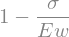

In [125]:
omega_val = sp.solve(sp.Eq(sigma, sigma_), omega)
omega_val[0]

In [126]:
sigma_1 = E * w
omega_val_1 = omega_val[0].subs(sigma, sigma_1)
omega_val_1

In [127]:
get_omega_1 = sp.lambdify((w), omega_val_1.subs(params), 'numpy')
omega_val_1.subs(params)

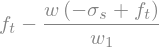

In [128]:
sigma_2 = f_t - (f_t - sigma_s) * (w / w_1) 
sigma_2

In [129]:
get_sigma_2 = sp.lambdify((w), sigma_2.subs(params), 'numpy')
sigma_2.subs(params)

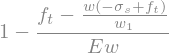

In [130]:
omega_val_2 = omega_val[0].subs(sigma, sigma_2)
omega_val_2

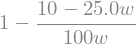

In [131]:
get_omega_2 = sp.lambdify((w), omega_val_2.subs(params), 'numpy')
omega_val_2.subs(params)

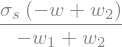

In [132]:
sigma_3 = sigma_s * (w_2 - w) / (w_2 - w_1)
sigma_3

In [133]:
get_sigma_3 = sp.lambdify((w), sigma_3.subs(params), 'numpy')
sigma_3.subs(params)

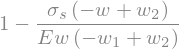

In [134]:
omega_val_3 = omega_val[0].subs(sigma, sigma_3)
omega_val_3

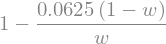

In [135]:
get_omega_3 = sp.lambdify((w), omega_val_3.subs(params), 'numpy')
omega_val_3.subs(params)

### Part 2
- Calculating damage when $w = w_1$

In [136]:
omega_2_rep = omega_val_2.subs(w, w_1)
omega_2 = omega_2_rep.subs(params)
omega_2

Stiffness:
\begin{gather*}
\mathrm{E(w_1)} = (1 - \omega) \mathrm{E}
\end{gather*}

In [137]:
E_w_1 = (1 - omega_2) * E.subs(params)
E_w_1

### Part 3
- Sketch graphically the derived damage function in a damage opening relation

In [139]:
omega_3_rep = omega_val_3.subs(w, w_2)
omega_3 = omega_3_rep.subs(params)
omega_3

In [140]:
sp.Piecewise(
    (omega_1, w < w_0),
    (omega_2, w < w_1),
    (omega_3, True)
)

NameError: name 'omega_1' is not defined

In [119]:
def get_response(w_2=1, n_steps=100): 
    omega_rec = [] 
    w = np.linspace(0,w_2,n_steps+1)
    w_0 = 0.1
    w_1 = 0.2
    for w_ in w:
        omega = []
        if w_ <= w_0:
            omega = get_omega_1(w_)    
        elif w_ <= w_1: 
            omega = get_omega_2(w_)
        else:
            omega = get_omega_3(w_)
        omega_rec.append(omega) 
    return (
        w, np.array(omega_rec,dtype=np.float_)
    )

<IPython.core.display.Javascript object>


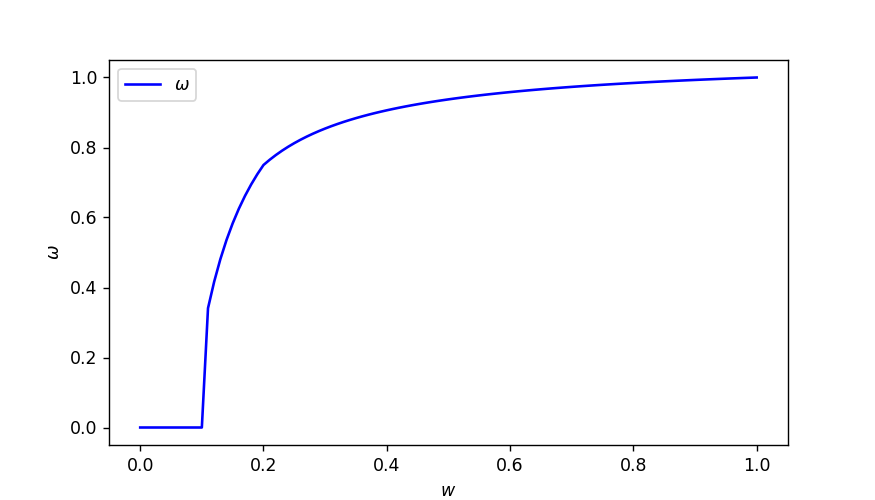

In [120]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
n_step_range = np.arange(1,2)*100
w_v = 1
for n_step in n_step_range:
    w, omega_rec = get_response(w_v,n_step) 
    #print(w, omega_rec) 
    ax1.plot(w, omega_rec[:], color='b', label = '$\omega$')
    ax1.set_xlabel('$w$'); ax1.set_ylabel('$\omega$')
    ax1.legend()

## Calculating local cohesive breaking energy
\begin{gather*}
g_f(x) =\int_{0}^{w_x} \sigma(w)dw
\end{gather*}

In [21]:
w = sp.Symbol(r'w', real = True)
w_x = sp.Symbol('w_x', nonnegative = True)
f_c = sp.Symbol('f_c', nonnegative = True)
sigma_s = sp.Symbol(r'\sigma_s', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)
D = sp.Symbol('D', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
a_0 = sp.Symbol('a_0', nonnegative = True)
f_t = sp.Symbol('f_t', nonnegative = True)
CMOD_c = sp.Symbol('CMOD_c', nonnegative = True)

In [22]:
params = {P_max : 10, 
          D : 2, 
          H_0 : 1, 
          B : 1.5, 
          E : 1000, 
          a_0 : 0.1, 
          CMOD_c : 0.15,
          sigma_s : 5,
          f_t : 10
         }

\begin{gather*}
w_x = CMOD_c\left[\left(1 - \frac{x}{a_c}\right)^2 + \left(1.081 - 1.149 \left(\frac{a_c}{D}\right)\right)\left[\frac{x}{a_c} - \left(\frac{a_0}{a_c}\right)^2\right]\right]^{1/2} 
\end{gather*}
\begin{gather*}
a_i = \frac{2}{\pi}(D + H_0) \arctan{\sqrt{\frac{B E C_{si}}{32.6} - 0.1135}} - H_0
\end{gather*}

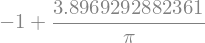

In [23]:
C_si = CMOD_c / P_max
a_i = (2/sp.pi) * (D + H_0) * sp.atan(sp.sqrt((B*E*C_si)/(32.6)-0.1135)) - H_0
a_c_ = a_i.subs(params)
a_c_

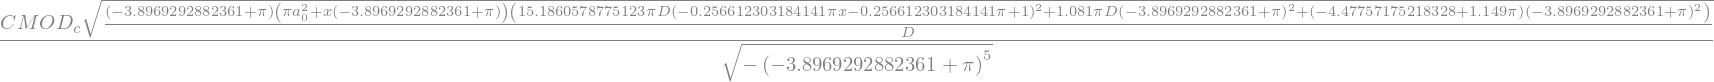

In [69]:
a_c  = sp.Symbol('a_c', nonnegative = True)
x = sp.Symbol('x', nonnegative = True)
w_x_ = w_x.subs(a_c,a_c_)
wx_ = sp.simplify(w_x_)
wx_

In [70]:
get_w_x = sp.lambdify((x), wx_.subs(params), 'numpy')
get_w_x

<function _lambdifygenerated(x)>

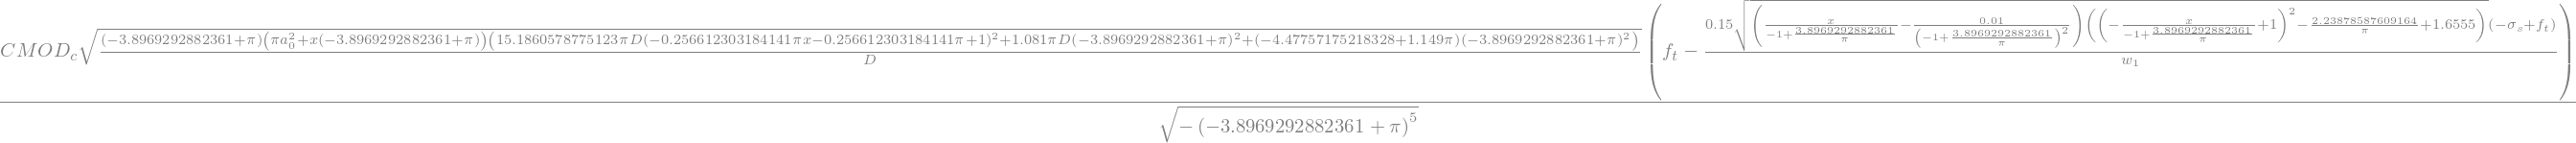

In [71]:
g_1 = sp.integrate(sigma_2, (w, 0, wx_)) 
g_1

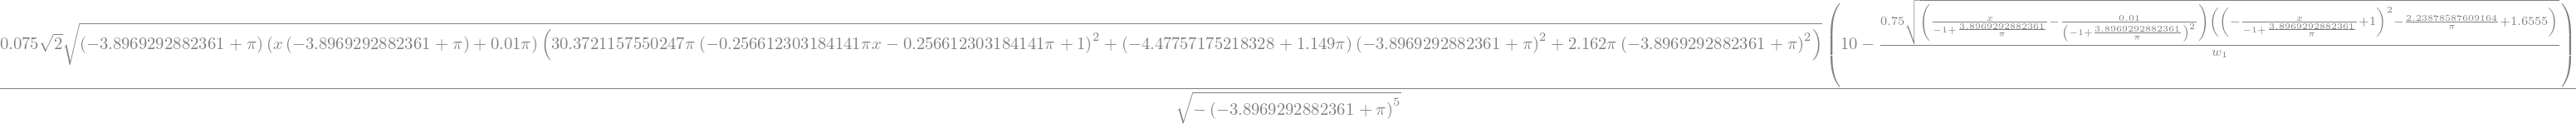

In [72]:
g_1_ = g_1.subs(params)
get_g_1 = sp.lambdify((x, w_1), g_1_, 'numpy')
get_g_1
g_1_

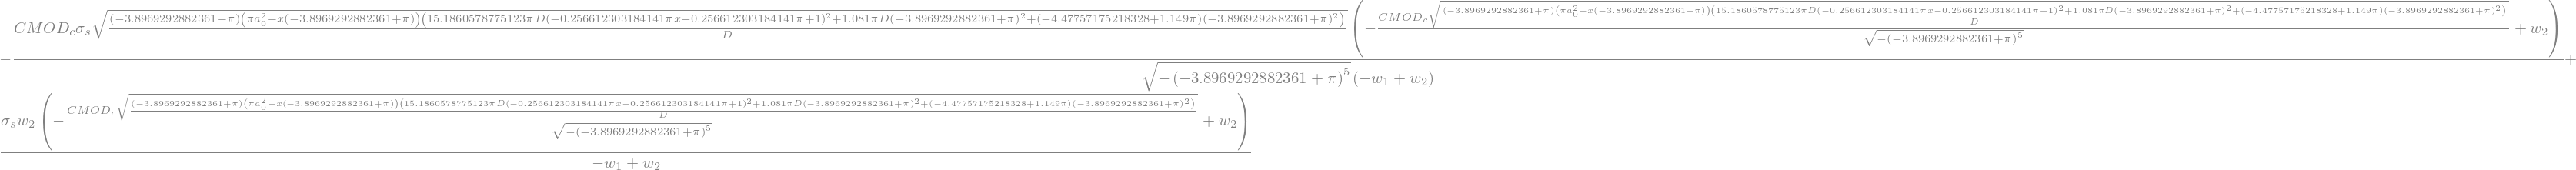

In [94]:
g_2 = sp.integrate(sigma_3,(w, wx_, w_2))
g_2

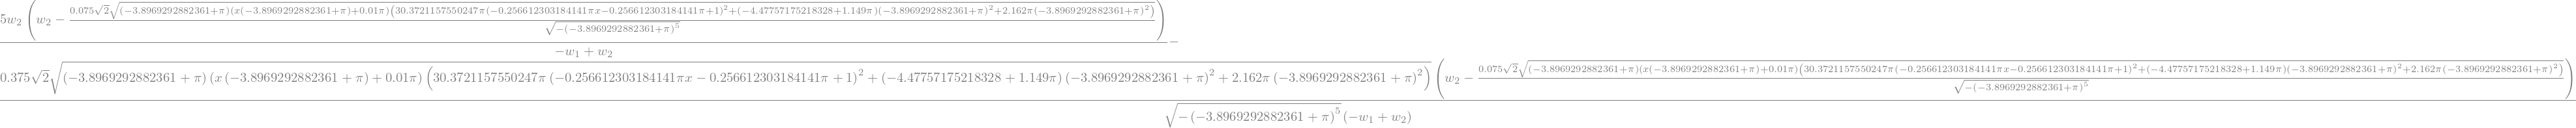

In [95]:
g_2_ = g_2.subs(params)
get_g_2 = sp.lambdify((x, w_1, w_2), g_2_, 'numpy')
get_g_2
g_2_

In [96]:
def get_response(n_steps=10): 
    w_rec, g_rec = [], [] 
    x = np.linspace(0.1,1,n_steps+1)
    w_1 = 0.2
    w_2 = 1
    for x_ in x:
        g = []
        w_ = []
        w_ = get_w_x(x_)
        if w_ <= w_1:
            g = get_g_1(x_, w_1)
        elif w_1 < w_ <= w_2:
            g = get_g_2(x_, w_1, w_2)
            #print(g)
        #print(w_)
        w_rec.append(w_)
        g_rec.append(g)
    return (
        x, np.array(w_rec,dtype=np.float_),
        np.array(g_rec,dtype=np.float_)
    )

<img src="gfdistribution.png" width="600"/> 

<IPython.core.display.Javascript object>


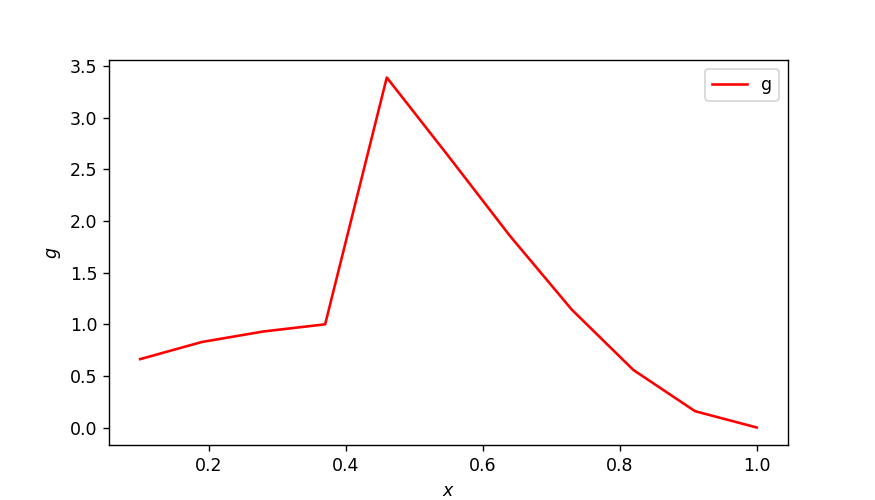

In [97]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
n_step_range = np.arange(1,2)*10
for n_step in n_step_range:
    x, w_arr,g_arr = get_response(n_step) 
    #print(x, g_arr) 
    ax1.plot(x, g_arr[:], color='r', label = 'g')
    ax1.set_xlabel('$x$'); ax1.set_ylabel('$g$')
    ax1.legend()

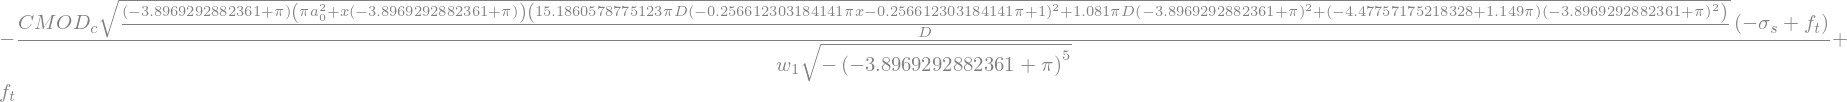

In [98]:
x = sp.Symbol('x', nonnegative = True)
sigma_2 = f_t - (f_t - sigma_s) * (wx_ / w_1) 
sigma_2

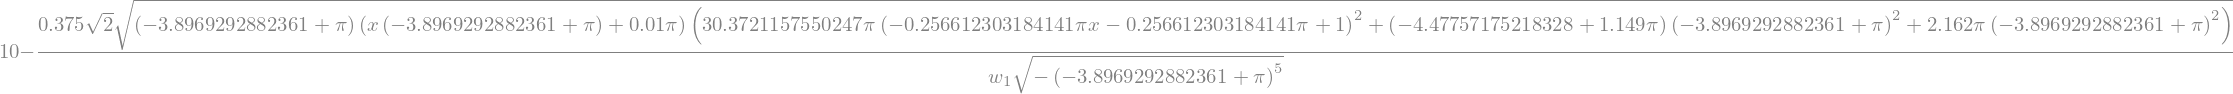

In [99]:
get_sigma_2 = sp.lambdify((x, w_1), sigma_2.subs(params), 'numpy')
sigma_2.subs(params)

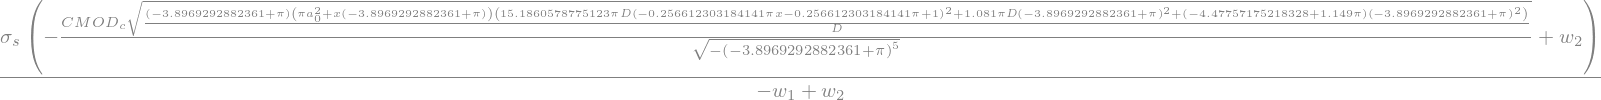

In [100]:
sigma_3 = sigma_s * (w_2 - wx_) / (w_2 - w_1)
sigma_3

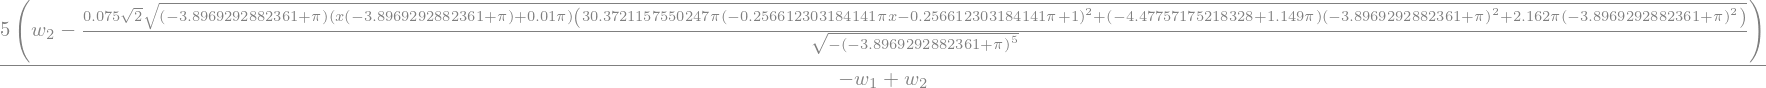

In [101]:
get_sigma_3 = sp.lambdify((x, w_1, w_2), sigma_3.subs(params), 'numpy')
sigma_3.subs(params)

In [102]:
def get_response(n_steps=10): 
    sigma_rec = [] 
    x = np.linspace(0.1,1,n_steps+1)
    w_1 = 0.2
    w_2 = 1
    for x_ in x:
        w_ = []
        w_ = get_w_x(x_)
        if w_ <= w_1: 
            sigma = get_sigma_2(x_, w_1)
        elif w_1 < w_ <= w_2 :
            sigma = get_sigma_3(x_, w_1, w_2) 
        sigma_rec.append(sigma)
    return (
        x, np.array(sigma_rec,dtype=np.float_)
    )

<img src="cracktipzoom.png" width="600"/> 

<IPython.core.display.Javascript object>


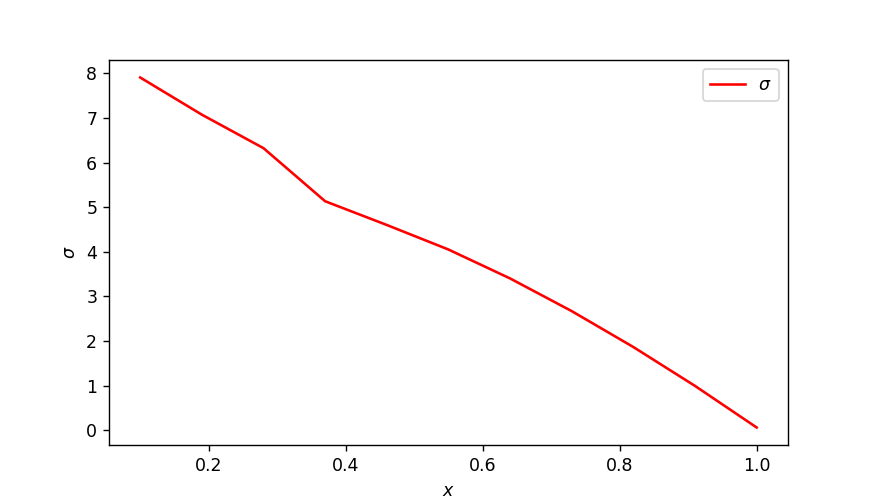

[0.1  0.19 0.28 0.37 0.46 0.55 0.64 0.73 0.82 0.91 1.  ] [7.90560519 7.07319144 6.32233082 5.13284611 4.60144782 4.05150584
 3.40322475 2.67137169 1.86624264 0.99519539 0.06371618]


In [103]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
n_step_range = np.arange(1,2)*10
for n_step in n_step_range:
    x, sigma_rec = get_response(n_step) 
    print(x, sigma_rec) 
    ax1.plot(x, sigma_rec[:], color='r', label = '$\sigma$')
    ax1.set_xlabel('$x$'); ax1.set_ylabel('$\sigma$')
    ax1.legend()

## Energy Dissipation at Crack Extension
To determine the energy dissipation at any crack extension $a$ in FPZ, the summation of the values of local cohesive breaking energy at every location in the range of $a$ to $a_0$ is obtained as:
\begin{gather*}
\Pi = \int_{a_0}^{a} g(f_x)dx
\end{gather*}

In [104]:
x = sp.Symbol('x', nonnegative = True)
a_0_ = sp.Symbol('a_0', nonnegative = True)
a_c = sp.Symbol('a_c', nonnegative = True)
w_1 = sp.Symbol('w_1', nonnegative = True)

In [105]:
params = {P_max : 10, 
          D : 2, 
          H_0 : 1, 
          B : 1.5, 
          E : 1000, 
          a_0_ : 0.1, 
          CMOD_c : 0.15,
          sigma_s : 5,
          f_t : 10
         }

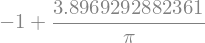

In [106]:
C_si = CMOD_c / P_max
a_i = (2/sp.pi) * (D + H_0) * sp.atan(sp.sqrt((B*E*C_si)/(32.6)-0.1135)) - H_0
a_c_ = a_i.subs(params)
a_c_

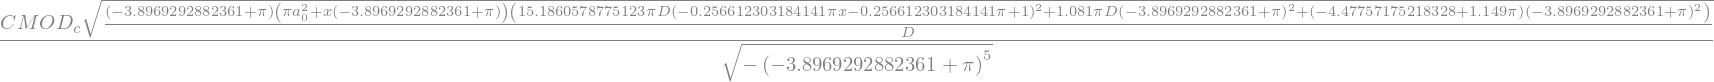

In [107]:
w_x_ = w_x.subs(a_c,a_c_)
wx_ = sp.simplify(w_x_)
wx_

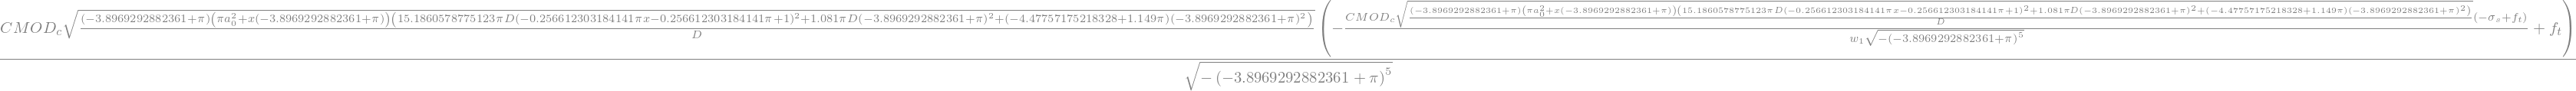

In [108]:
g_1 = sp.integrate(sigma_2, (w, 0, wx_)) 
g_1

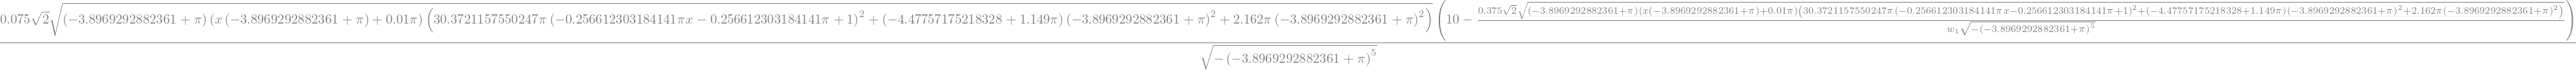

In [109]:
g_1_ = g_1.subs(params)
g_1_

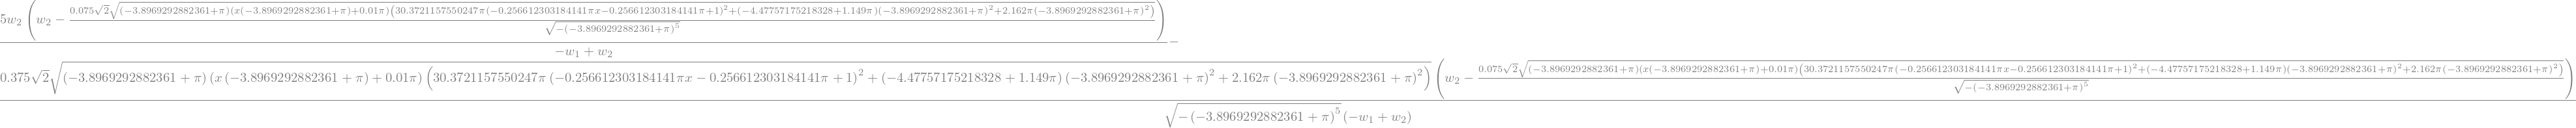

In [110]:
g_2_

In [111]:
Pi_1 = sp.integrate(g_1, (x, a_0_.subs(params), a_c.subs(a_c, a_c_)))
Pi_1

PolynomialDivisionFailed: couldn't reduce degree in a polynomial division algorithm when dividing [2.0*D*pi**4 - 7.7938585764722*D*pi**3, 2.0*D*a_0**2*pi**4 + 4.0*D*pi**4 - 31.1754343058888*D*pi**3 + 60.7442315100493*D*pi**2, 4.0*D*a_0**2*pi**4 - 15.5877171529444*D*a_0**2*pi**3 + 4.162*D*pi**4 - 48.657059092916*D*pi**3 + 189.613118658619*D*pi**2 - 246.302971844853*D*pi + 2.298*pi**4 - 35.8205740174662*pi**3 + 209.38536601514*pi**2 - 543.973310234957*pi + 529.956381168337, 4.162*D*a_0**2*pi**4 - 32.4380393952773*D*a_0**2*pi**3 + 63.2043728862063*D*a_0**2*pi**2 + 2.298*a_0**2*pi**4 - 26.8654305130997*a_0**2*pi**3 + 104.69268300757*a_0**2*pi**2 - 135.993327558739*a_0**2*pi] by [-1.13686837721616e-13*D**5*a_0**6*pi**18 + 9.09494701772928e-13*D**5*a_0**4*pi**18 + 5.45696821063757e-12*D**5*a_0**4*pi**17 + 1.45519152283669e-11*D**5*a_0**4*pi**16 + 5.6843418860808e-14*D**5*a_0**2*pi**20 - 9.09494701772928e-13*D**5*a_0**2*pi**19 - 8.73114913702011e-11*D**5*a_0**2*pi**17 + 2.3283064365387e-10*D**5*a_0**2*pi**16 + 2.3283064365387e-10*D**5*a_0**2*pi**14 - 1.70530256582424e-13*D**5*pi**20 + 1.81898940354586e-12*D**5*pi**19 + 1.45519152283669e-11*D**5*pi**18 - 2.91038304567337e-10*D**5*pi**17 + 2.79396772384644e-9*D**5*pi**16 - 7.45058059692383e-9*D**5*pi**15 + 5.58793544769287e-9*D**5*pi**14 - 3.72529029846191e-9*D**5*pi**13 + 9.31322574615479e-9*D**5*pi**12 - 3.63797880709171e-12*D**4*a_0**2*pi**18 + 1.45519152283669e-11*D**4*a_0**2*pi**17 + 1.16415321826935e-10*D**4*a_0**2*pi**16 - 6.98491930961609e-10*D**4*a_0**2*pi**15 + 9.31322574615479e-10*D**4*a_0**2*pi**14 - 2.3283064365387e-10*D**4*a_0**2*pi**13 - 1.45519152283669e-11*D**4*pi**18 + 1.16415321826935e-10*D**4*pi**17 - 4.65661287307739e-10*D**4*pi**16 - 9.31322574615479e-10*D**4*pi**15 + 7.45058059692383e-9*D**4*pi**14 - 2.98023223876953e-8*D**4*pi**13 + 7.45058059692383e-9*D**4*pi**12 + 5.58793544769287e-9*D**4*pi**11, -2.27373675443232e-13*D**5*a_0**6*pi**18 + 8.86059135208621e-13*D**5*a_0**6*pi**17 + 2.8421709430404e-14*D**5*a_0**4*pi**20 + 7.27595761418343e-12*D**5*a_0**4*pi**18 - 2.91038304567337e-11*D**5*a_0**4*pi**17 + 2.91038304567337e-11*D**5*a_0**4*pi**16 - 8.73114913702011e-11*D**5*a_0**4*pi**15 - 1.70530256582424e-13*D**5*a_0**2*pi**20 + 1.81898940354586e-12*D**5*a_0**2*pi**19 + 1.45519152283669e-11*D**5*a_0**2*pi**18 - 3.49245965480804e-10*D**5*a_0**2*pi**17 + 2.3283064365387e-9*D**5*a_0**2*pi**16 - 2.79396772384644e-9*D**5*a_0**2*pi**15 + 1.86264514923096e-9*D**5*a_0**2*pi**14 - 3.25962901115417e-9*D**5*a_0**2*pi**13 - 1.4210854715202e-13*D**5*pi**20 + 9.09494701772928e-13*D**5*pi**19 + 4.36557456851006e-11*D**5*pi**18 - 6.98491930961609e-10*D**5*pi**17 + 5.58793544769287e-9*D**5*pi**16 - 2.42143869400024e-8*D**5*pi**15 + 5.21540641784668e-8*D**5*pi**14 - 7.45058059692383e-8*D**5*pi**13 + 5.96046447753906e-8*D**5*pi**12 - 4.84287738800049e-8*D**5*pi**11 - 2.27373675443232e-13*D**4*a_0**4*pi**19 + 7.55432958666484e-13*D**4*a_0**4*pi**18 + 2.03616389270941e-12*D**4*a_0**4*pi**17 + 2.64973516464465e-12*D**4*a_0**4*pi**16 - 4.03383971589327e-11*D**4*a_0**4*pi**15 + 2.65832521006419e-11*D**4*a_0**4*pi**14 - 7.27595761418343e-12*D**4*a_0**2*pi**18 + 1.16415321826935e-10*D**4*a_0**2*pi**17 - 1.39698386192322e-9*D**4*a_0**2*pi**16 + 1.86264514923096e-9*D**4*a_0**2*pi**15 + 3.72529029846191e-9*D**4*a_0**2*pi**14 - 5.58793544769287e-9*D**4*a_0**2*pi**13 + 1.86264514923096e-9*D**4*a_0**2*pi**12 - 5.6843418860808e-14*D**4*pi**20 + 1.81898940354586e-12*D**4*pi**19 + 1.45519152283669e-11*D**4*pi**18 + 4.65661287307739e-9*D**4*pi**16 - 2.98023223876953e-8*D**4*pi**15 + 1.04308128356934e-7*D**4*pi**14 - 2.08616256713867e-7*D**4*pi**13 + 2.98023223876953e-7*D**4*pi**12 - 1.78813934326172e-7*D**4*pi**11 + 1.34110450744629e-7*D**4*pi**10 - 1.45519152283669e-11*D**3*pi**18 + 1.16415321826935e-10*D**3*pi**17 - 9.31322574615479e-10*D**3*pi**16 + 3.72529029846191e-9*D**3*pi**15 + 2.98023223876953e-8*D**3*pi**14 - 5.96046447753906e-8*D**3*pi**13 + 1.19209289550781e-7*D**3*pi**12 - 2.38418579101563e-7*D**3*pi**11 + 1.78813934326172e-7*D**3*pi**10 - 5.96046447753906e-8*D**3*pi**9, -2.36582309298683e-13*D**5*a_0**6*pi**18 + 1.84388906036914e-12*D**5*a_0**6*pi**17 - 3.59275264180532e-12*D**5*a_0**6*pi**16 + 4.54747350886464e-13*D**5*a_0**4*pi**19 - 2.91038304567337e-11*D**5*a_0**4*pi**17 + 5.82076609134674e-11*D**5*a_0**4*pi**16 - 1.16415321826935e-10*D**5*a_0**4*pi**15 + 4.07453626394272e-10*D**5*a_0**4*pi**14 - 1.4210854715202e-13*D**5*a_0**2*pi**20 + 9.09494701772928e-13*D**5*a_0**2*pi**19 + 3.63797880709171e-11*D**5*a_0**2*pi**18 - 5.82076609134674e-10*D**5*a_0**2*pi**17 + 3.72529029846191e-9*D**5*a_0**2*pi**16 - 9.31322574615479e-9*D**5*a_0**2*pi**15 + 1.11758708953857e-8*D**5*a_0**2*pi**14 - 1.11758708953857e-8*D**5*a_0**2*pi**13 + 1.21071934700012e-8*D**5*a_0**2*pi**12 - 1.30626176542137e-13*D**4*a_0**6*pi**18 + 1.52712291953206e-12*D**4*a_0**6*pi**17 - 5.9510900318611e-12*D**4*a_0**6*pi**16 + 7.73032568069648e-12*D**4*a_0**6*pi**15 - 2.27373675443232e-13*D**4*a_0**4*pi**19 + 3.63797880709171e-12*D**4*a_0**4*pi**18 - 2.91038304567337e-11*D**4*a_0**4*pi**17 + 1.16415321826935e-10*D**4*a_0**4*pi**16 - 4.65661287307739e-10*D**4*a_0**4*pi**15 + 9.31322574615479e-10*D**4*a_0**4*pi**14 - 9.31322574615479e-10*D**4*a_0**4*pi**13 - 5.6843418860808e-14*D**4*a_0**2*pi**20 + 9.09494701772928e-13*D**4*a_0**2*pi**19 - 2.3283064365387e-10*D**4*a_0**2*pi**17 + 2.79396772384644e-9*D**4*a_0**2*pi**16 - 1.49011611938477e-8*D**4*a_0**2*pi**15 + 4.4703483581543e-8*D**4*a_0**2*pi**14 - 2.98023223876953e-8*D**4*a_0**2*pi**13 + 4.4703483581543e-8*D**4*a_0**2*pi**12 - 2.60770320892334e-8*D**4*a_0**2*pi**11 + 2.27373675443232e-13*D**3*a_0**2*pi**19 - 4.65661287307739e-10*D**3*a_0**2*pi**16 + 1.11758708953857e-8*D**3*a_0**2*pi**14 - 2.98023223876953e-8*D**3*a_0**2*pi**13 + 5.96046447753906e-8*D**3*a_0**2*pi**12 - 4.4703483581543e-8*D**3*a_0**2*pi**11 + 1.49011611938477e-8*D**3*a_0**2*pi**10]. This can happen when it's not possible to detect zero in the coefficient domain. The domain of computation is RR[D,_x0,a_0,pi]. Zero detection is guaranteed in this coefficient domain. This may indicate a bug in SymPy or the domain is user defined and doesn't implement zero detection properly.

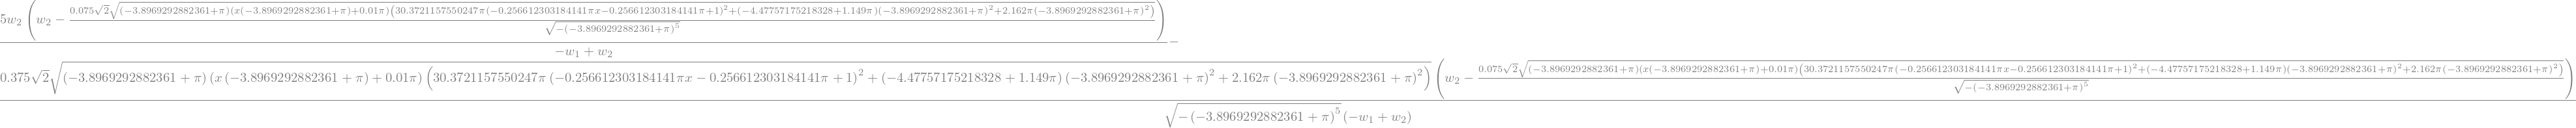

In [118]:
Pi_2 = sp.integrate(g_2.subs(params), (x, a_0_.subs(params), a_c.subs(a_c, a_c_)))
Pi_2

### Determining Cohesive Breaking Energy
$G_{I-cohesive}$ is defined as the average energy dissipation per unit length due to bridging cohesive action:
\begin{gather*}
G_{I-cohesive} = \frac{1}{a - a_0} \int_{a_0}^{a} \int_{0}^{w} \sigma(w_x) dw dx
\end{gather*} 
especially when crack length $a$ reaches critical effective crack propagation length $a_c$, $G_{I-cohesive}$ becomes critical cohesive crack breaking energy $G^c_{Ic}$ and is given as:
\begin{gather*}
G_{Ic} = \frac{1}{a_c - a_0} \int_{a_0}^{a_c} \int_{0}^{w} \sigma(w_x) dw dx
\end{gather*} 

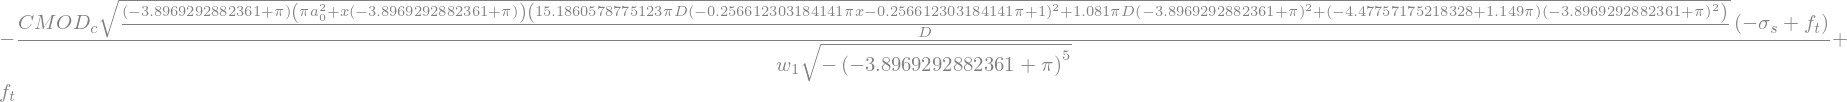

In [114]:
sigma_2 = f_t - (f_t - sigma_s) * (wx_ / w_1) 
sigma_2

In [116]:
a_0  = sp.Symbol('a_0', nonnegative = True)
a_c  = sp.Symbol('a_c', nonnegative = True)
x = sp.Symbol('x', nonnegative = True)
a = sp.Symbol('a', nonnegative = True)
G_Ic = (1/(a_c - a_0)) * sp.integrate(sp.integrate( sigma_2.subs(params),(w, 0, w)),(x, a_0, a_c))
G_Ic_ = sp.simplify(G_Ic)
G_Ic_
w

PolynomialDivisionFailed: couldn't reduce degree in a polynomial division algorithm when dividing [4.0*pi**4 - 15.5877171529444*pi**3, 8.04*pi**4 - 62.3508686117776*pi**3 + 121.488463020099*pi**2, 10.702*pi**4 - 133.446446546357*pi**3 + 588.611603332378*pi**2 - 1036.57925392466*pi + 529.956381168337, 0.10622*pi**4 - 0.917415093036543*pi**3 + 2.31101428779983*pi**2 - 1.35993327558739*pi] by [-7.27595761418343e-12*pi**20 + 8.73114913702011e-11*pi**19 - 4.65661287307739e-10*pi**18 + 1.11758708953857e-8*pi**17 - 4.4703483581543e-8*pi**16 - 3.57627868652344e-7*pi**12 + 8.94069671630859e-8*pi**11, -6.3664629124105e-12*pi**20 + 1.74622982740402e-10*pi**19 - 1.86264514923096e-9*pi**18 + 1.49011611938477e-8*pi**17 - 5.96046447753906e-8*pi**16 + 4.76837158203125e-7*pi**15 - 9.5367431640625e-7*pi**14 + 9.5367431640625e-7*pi**13 + 5.7220458984375e-6*pi**12 - 5.7220458984375e-6*pi**11 + 9.5367431640625e-7*pi**10 - 4.76837158203125e-7*pi**9, -5.6843418860808e-14*pi**20 + 1.36424205265939e-12*pi**19 - 7.27595761418343e-12*pi**18 - 4.65661287307739e-10*pi**16 + 9.31322574615479e-10*pi**15 + 7.45058059692383e-9*pi**12 - 7.45058059692383e-9*pi**11 + 9.31322574615479e-10*pi**10]. This can happen when it's not possible to detect zero in the coefficient domain. The domain of computation is RR[_x2,pi]. Zero detection is guaranteed in this coefficient domain. This may indicate a bug in SymPy or the domain is user defined and doesn't implement zero detection properly.